In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[ : , :-1].values
Y = dataset.iloc[ : ,  4 ].values

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer  # Import this for the update

labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

# Update the OneHotEncoder initialization
onehotencoder = OneHotEncoder()  # Remove categorical_features

# Use ColumnTransformer to specify which column to encode
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', onehotencoder, [3])  # Specify the index of the column to one-hot encode
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

X = column_transformer.fit_transform(X)


In [4]:
X = X[: , 1:]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
y_pred = regressor.predict(X_test)

[191660.77438506]


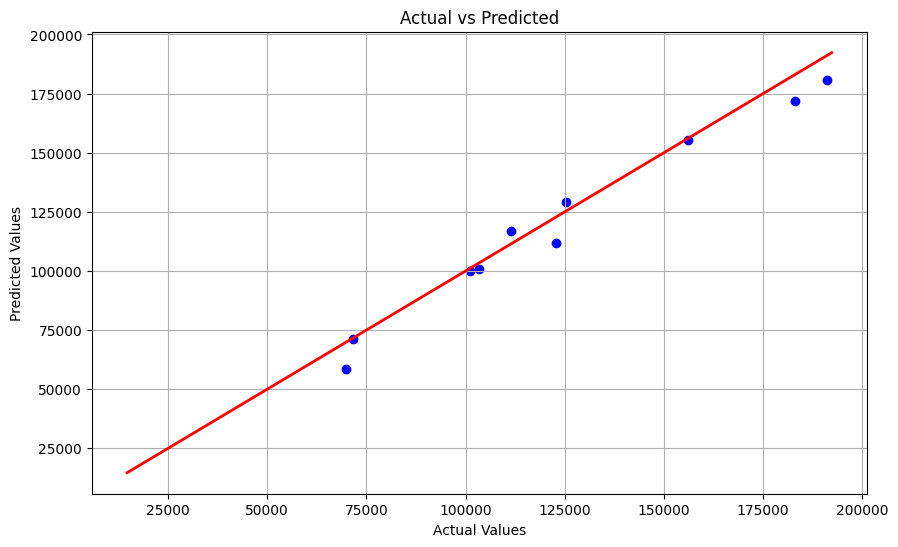

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 4].values

# Encode categorical data
from sklearn.preprocessing import LabelEncoder
X[:, 3] = LabelEncoder().fit_transform(X[:, 3])  # Assuming the 4th column is categorical


# Split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

# Fit the linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Make predictions
y_pred = regressor.predict(X_test)
print(regressor.predict([[165000,137000,471000,1]]))
# Visualization: Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, color='blue')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linewidth=2)  # Diagonal line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


